#### Import necessary library!!

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
#import the csv file
df = pd.read_csv("homeprices_banglore.csv")
df.sample(5)

,area,bedrooms,price
11,2785,4,140.0
8,1310,3,50.0
17,1540,3,60.0
5,1170,2,38.0
18,2770,3,102.0


In [4]:
# data scaling
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_x = sx.fit_transform(df.drop('price', axis = 'columns'))
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [5]:
#Scaled and reshape y
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [6]:
w = np.ones(shape=(2))

**price = area * w1 + bedrooms * w2 + bias**

**w1 = w1 - learning rate * d(MSE)/dw1 (MSE = means square error)**

**w2 = w2 - learning rate * d(MSE)/dw2 (MSE = means square error)**

**b = b - learning rate * d(MSE)/db (MSE = means square error)**

In [7]:
def batch_gradient_descent(x,y_true, epochs, learning_rate = 0.01):
    number_of_features = x.shape[1]
    
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = x.shape[0]
    
    cost_list = []
    epoch_list = []
    # gradient descent
    for i in range(epochs):
        y_predicted = np.dot(w, scaled_x.T) + b
        
        #calculate d(MSE)/dw and d(MSE)/db
        w_grad = -(2/total_samples)*(x.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true-y_predicted))
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

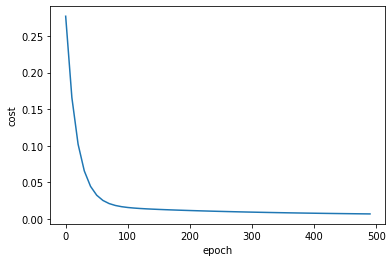

In [8]:
#ploting
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)

# Prediction

In [9]:
#scaling
sx.transform([[2600, 4]])

E:\Code\Py Code\Python installation\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.62068966, 0.75      ]])

In [10]:
# check w
w

array([0.70712464, 0.67456527])

In [11]:
#reverse scaled data to actual data
sy.inverse_transform([[1, 0.5, 0]])

array([[167. ,  99.5,  32. ]])

In [12]:
#prediction
def predict(area,bedrooms,w,b):
    scaled_x = sx.transform([[area,bedrooms]])[0]
    
    scaled_price = w[0]*scaled_x[0] + w[1] * scaled_x[1] + b
    return sy.inverse_transform([[scaled_price]])

In [13]:
predict(2600, 4, w, b)

E:\Code\Py Code\Python installation\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[128.45484403]])

In [14]:
predict(1000, 2, w, b)

E:\Code\Py Code\Python installation\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[30.25309446]])

In [15]:
predict(5000, 6, w, b)

E:\Code\Py Code\Python installation\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[252.99089064]])

# Stochastic Gradient descent

In [26]:
import random
random.randint(0,6)

2

In [44]:
def stochastic_gradient_descent(x,y_true, epochs, learning_rate = 0.01):
    number_of_features = x.shape[1]
    
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = x.shape[0]
    
    cost_list = []
    epoch_list = []
    # gradient descent
    for i in range(epochs):
        #random pick a sample
        random_index = random.randint(0,total_samples -1)
        #picking random sample
        sample_x = x[random_index]
        sample_y = y_true[random_index]
        y_predicted = np.dot(w, scaled_x.T) + b
        
        #calculate d(MSE)/dw and d(MSE)/db
        w_grad = -(2/total_samples)*(x.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.84091889, 0.30663612]),
 -0.09493108809204089,
 array([2.29361696e-02, 2.02130449e-01, 1.33689379e-03, 3.60611848e-03,
        1.20322315e-02, 1.40163268e-02, 2.38012234e-01, 4.25843423e-01,
        1.28206036e-06, 7.14391375e-01, 1.98674765e-02, 2.53243733e-01,
        2.81183021e-02, 1.92344524e-02, 7.36783888e-02, 1.36751341e-02,
        1.50762292e-03, 4.29816049e-03, 1.78270565e-01, 9.14103797e-02]))

In [45]:
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

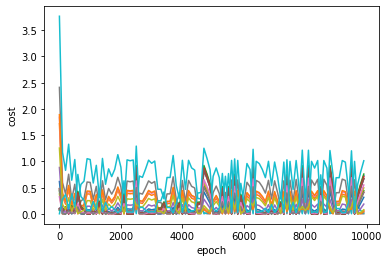

In [46]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [47]:
predict(2600,4,w_sgd,b_sgd)

E:\Code\Py Code\Python installation\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[120.69441413]])

In [48]:
predict(1500,3,w_sgd,b_sgd)

E:\Code\Py Code\Python installation\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[67.28459834]])